0.8507795100222717


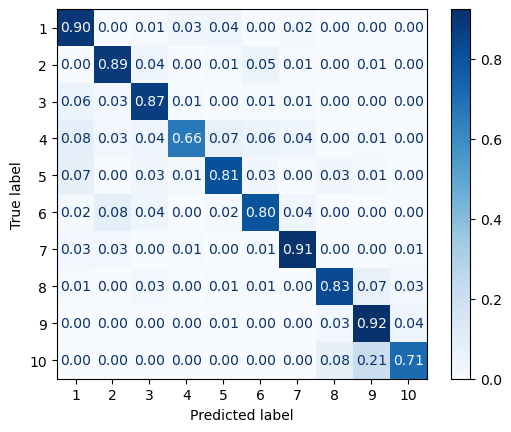

In [167]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import random
from matplotlib import cm
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import decomposition
from sklearn import discriminant_analysis
from sklearn import neighbors
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


## Problem 2 ##

# Part A #
# read in data #
np.set_printoptions(precision = 2, suppress = True)
x_train = pd.read_csv('x1.csv', header = None)
x_val = pd.read_csv('x2.csv', header = None)
x_test = pd.read_csv('x3.csv', header = None)
y_train = pd.read_csv('c1.csv', header = None)
y_val = pd.read_csv('c2.csv', header = None)

x_train_arr = x_train.to_numpy()
x_val_arr = x_val.to_numpy()
x_test_arr = x_test.to_numpy()
y_train_arr = y_train.to_numpy()
y_val_arr = y_val.to_numpy()

classifier = neighbors.KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train_arr, y_train_arr.reshape(-1))
pred = classifier.predict(x_val_arr)
score = classifier.score(x_val_arr, y_val_arr)
print(score)
cm = ConfusionMatrixDisplay.from_predictions(y_val_arr, pred, labels=range(1, 11), cmap='Blues', normalize='true', values_format='.2f')
cm.figure_.savefig('./images/PA-conf.png')


ANOVA Test
--------------------
Degree of freedom 1: 19
Degree of freedom 2: 20
F Critical Value: 0.4571
F-value: 0.4881
Significant difference in average scores?  True


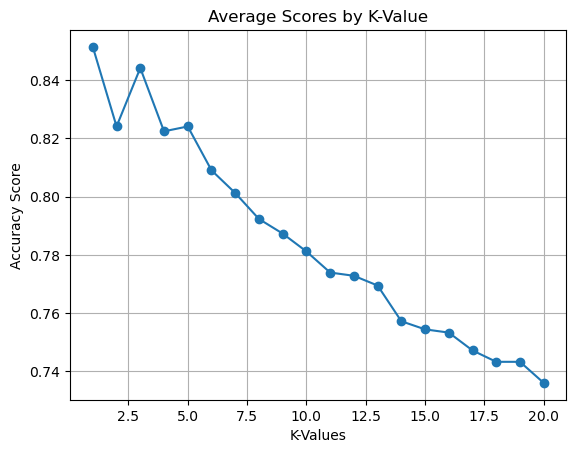

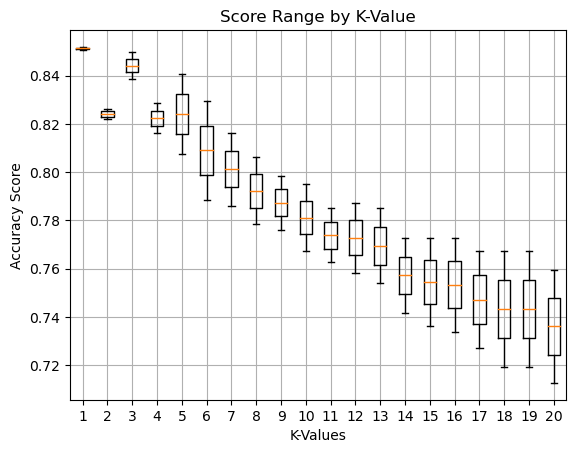

In [180]:
# Part B #
X = pd.concat([x_train, x_val], ignore_index=True, axis = 0)
y = pd.concat([y_train, y_val], ignore_index=True, axis = 0)

scores = []
k_values = [i for i in range(1, 21)]

for k in k_values:
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(classifier, X, y.to_numpy().reshape(-1), cv=2) # cv=2 here for 50-50 split of data as in original proportions
    scores.append(score)
avg = [np.array(scores[i]).mean() for i in range(len(scores))]

# K-Scores plot #
plt.figure()
plt.plot(k_values, avg, marker = 'o')
plt.grid()
plt.xlabel("K-Values")
plt.ylabel("Accuracy Score")
plt.title('Average Scores by K-Value')
plt.savefig("./images/QB-K-Scores")

# Box plot #
plt.figure()
axis = fig.add_axes([0, 0, 1, 1])
plt.boxplot(scores)
plt.grid()
plt.xlabel("K-Values")
plt.ylabel("Accuracy Score")
plt.title('Score Range by K-Value')
plt.savefig("./images/QB-Boxplot")


# ANOVA #
avg_all = np.array(avg).mean()

var_between = np.var(scores, axis=0)
var_within = np.var(scores, axis=1)
 
# Calculate F-statistic
f_value = sum(var_between) / sum(var_within)
 
# Calculate the degrees of freedom
df1 = len(scores) - 1
df2 = len(scores)
 
# p-value
F_crit_value = stats.f.cdf(1-0.05, df1, df2)

print("ANOVA Test")
print("--------------------")
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F Critical Value:", F_crit_value.round(4))
print("F-value:", f_value.round(4))
print("Significant difference in average scores? ", f_value > F_crit_value)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.700445434298441


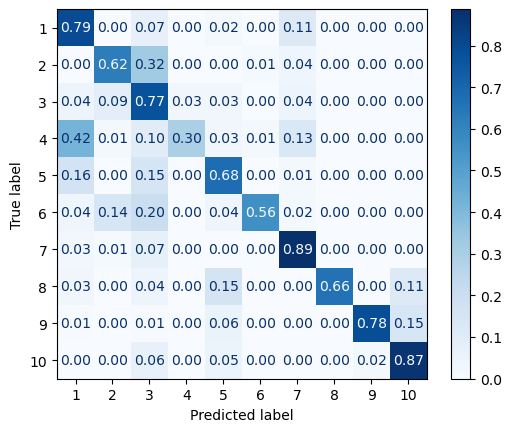

In [169]:
# Part C #
from collections import Counter

counter = Counter(y_train_arr.reshape(-1))
priors = [counter[i]/y_train_arr.shape[0] for i in counter]

classifier = discriminant_analysis.QuadraticDiscriminantAnalysis(priors=priors, store_covariance=True)
classifier.fit(x_train_arr, y_train_arr.reshape(-1))
pred = classifier.predict(x_val_arr)
score = classifier.score(x_val_arr, y_val_arr)
print(score)
cm = ConfusionMatrixDisplay.from_predictions(y_val_arr, pred, labels=range(1, 11), cmap='Blues', normalize='true', values_format='.2f')
cm.figure_.savefig('./images/PC-conf.png')